In [29]:
import os
from pathlib import Path

import numpy as np
import skimage as sk
import cv2 as cv
from commonfunctions import *

In [40]:
img = cv.imread("Dataset\\Vehicles\\2082.jpg", cv.IMREAD_GRAYSCALE)

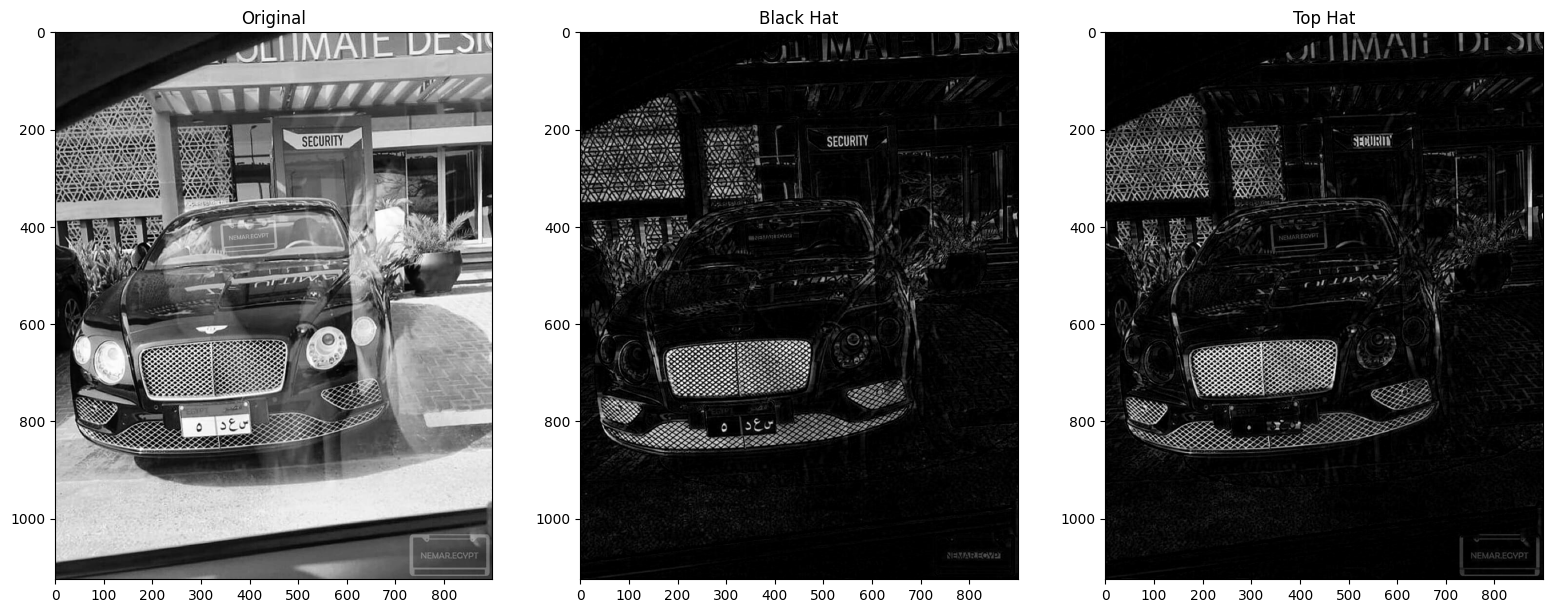

In [41]:
rectKern = cv.getStructuringElement(cv.MORPH_RECT, (13, 5))
blackHat = cv.morphologyEx(img, cv.MORPH_BLACKHAT, rectKern)
topHat = cv.morphologyEx(img, cv.MORPH_TOPHAT, rectKern)
show_images([img, blackHat, topHat], ["Original", "Black Hat", "Top Hat"])

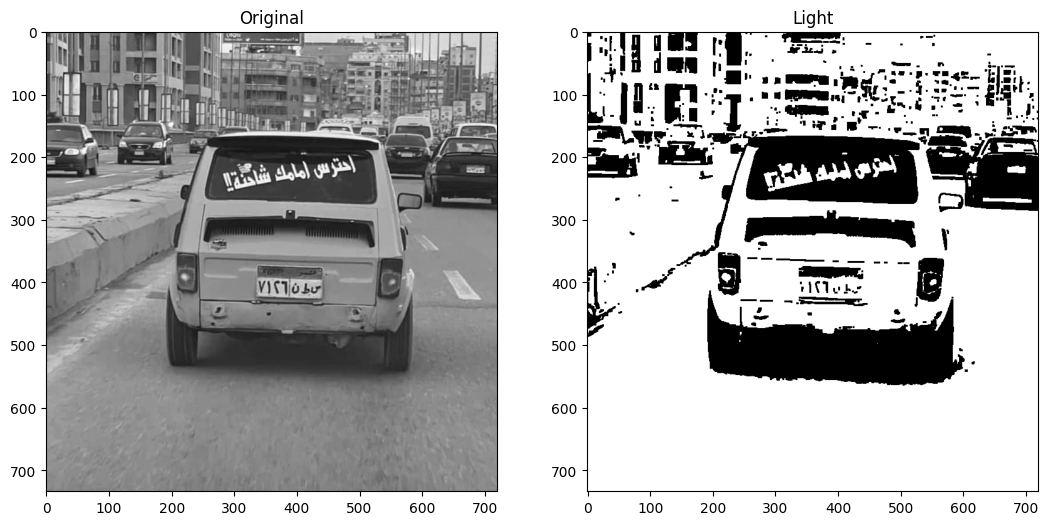

In [32]:
sqaureKern = cv.getStructuringElement(cv.MORPH_RECT, (3, 3))
light = cv.morphologyEx(img, cv.MORPH_CLOSE, sqaureKern)
light = cv.threshold(light, 0, 255, cv.THRESH_BINARY | cv.THRESH_OTSU)[1]
show_images([img, light], ['Original', 'Light'])

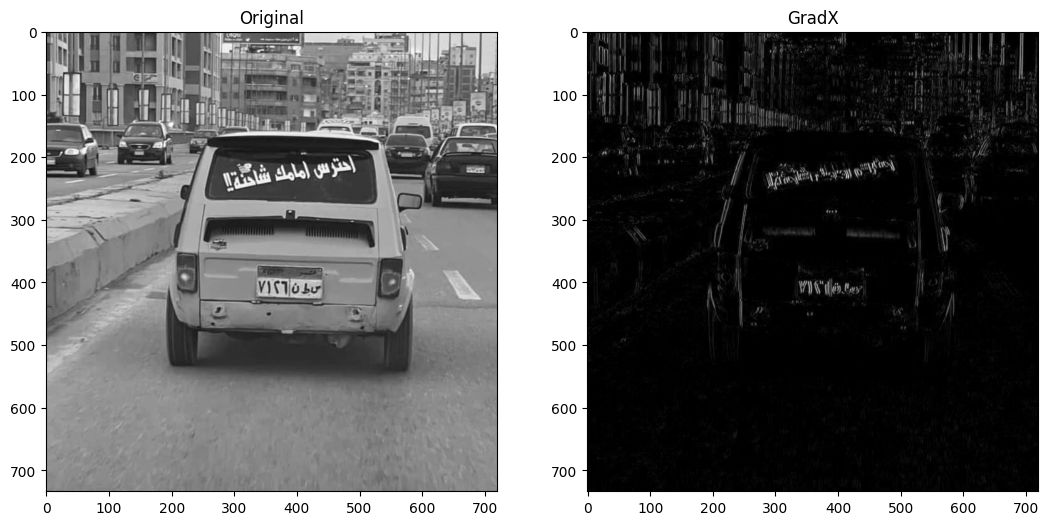

In [33]:
# gradX = cv2.Sobel(blackhat, ddepth=cv2.CV_32F,
# 			dx=1, dy=0, ksize=-1)
# 		gradX = np.absolute(gradX)
# 		(minVal, maxVal) = (np.min(gradX), np.max(gradX))
# 		gradX = 255 * ((gradX - minVal) / (maxVal - minVal))
# 		gradX = gradX.astype("uint8")
gradX = cv.Sobel(blackHat, cv.CV_32F, 1, 0, ksize=-1)
gradX = np.absolute(gradX)
(minVal, maxVal) = (np.min(gradX), np.max(gradX))
gradX = 255 * ((gradX - minVal) / (maxVal - minVal))
gradX = gradX.astype("uint8")
show_images([img, gradX], ['Original', 'GradX'])

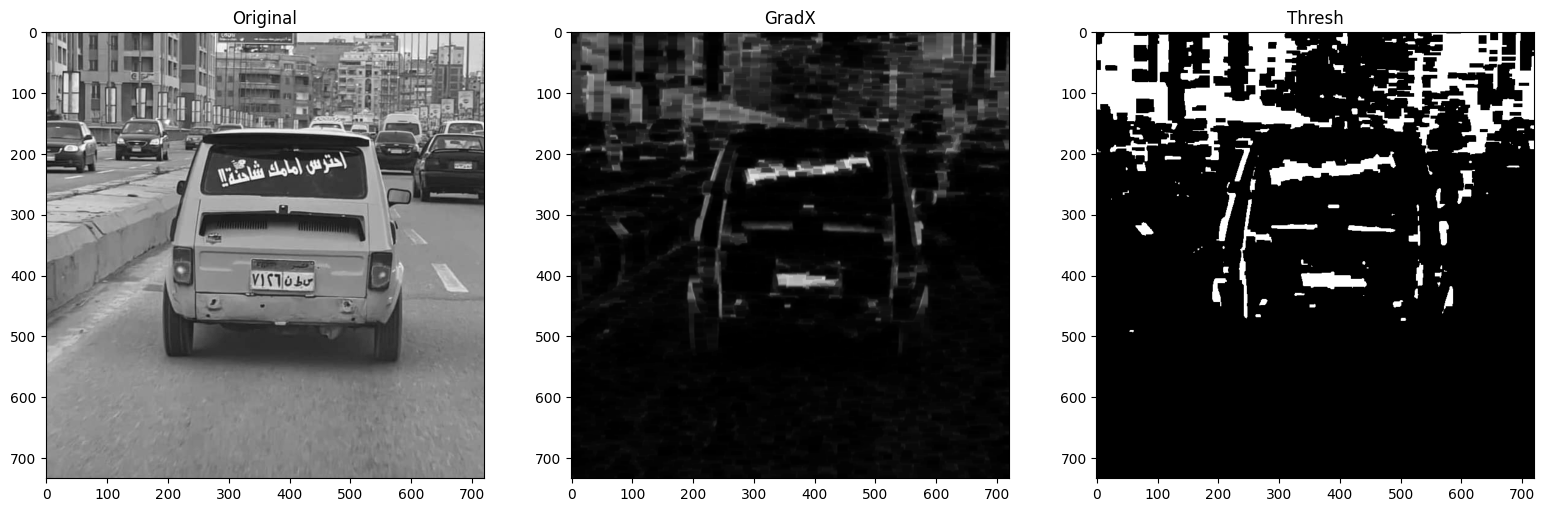

In [34]:
gradX = cv.GaussianBlur(gradX, (5, 5), 0)
gradX = cv.morphologyEx(gradX, cv.MORPH_CLOSE, rectKern)
thresh = cv.threshold(gradX, 0, 255,
	cv.THRESH_BINARY | cv.THRESH_OTSU)[1]
show_images([img, gradX, thresh], ['Original', 'GradX', 'Thresh'])

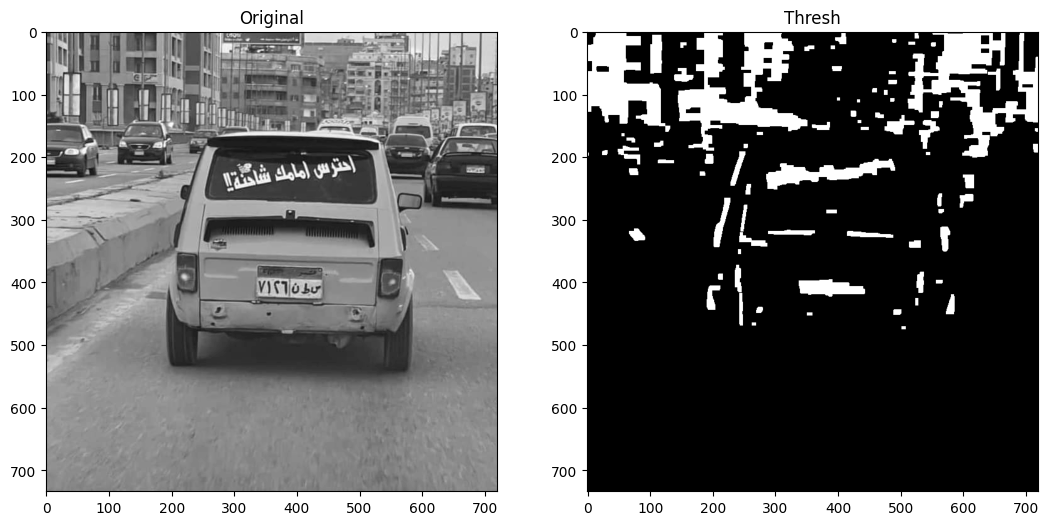

In [35]:
thresh = cv.erode(thresh, None, iterations=2)
thresh = cv.dilate(thresh, None, iterations=2)
show_images([img, thresh], ['Original', 'Thresh'])

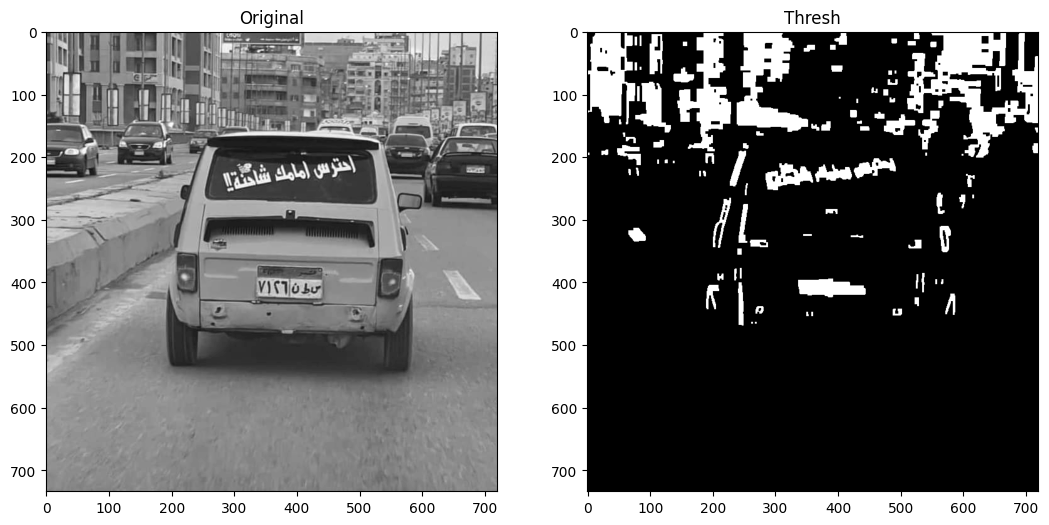

In [36]:
thresh = cv.bitwise_and(thresh, thresh, mask=light)
thresh = cv.dilate(thresh, None, iterations=2)
thresh = cv.erode(thresh, None, iterations=1)
show_images([img, thresh], ['Original', 'Thresh'])

In [37]:
import imutils

[array([[[550,   0]],

       [[550,   4]],

       [[551,   5]],

       [[551,   6]],

       [[568,   6]],

       [[569,   7]],

       [[569,  30]],

       [[568,  31]],

       [[567,  31]],

       [[566,  32]],

       [[566,  38]],

       [[565,  39]],

       [[559,  39]],

       [[559,  48]],

       [[558,  49]],

       [[556,  49]],

       [[556,  61]],

       [[558,  61]],

       [[560,  63]],

       [[560,  76]],

       [[559,  77]],

       [[550,  77]],

       [[549,  78]],

       [[549,  91]],

       [[548,  92]],

       [[538,  92]],

       [[537,  91]],

       [[537,  85]],

       [[536,  84]],

       [[536,  79]],

       [[535,  78]],

       [[535,  76]],

       [[536,  75]],

       [[537,  75]],

       [[537,  74]],

       [[539,  72]],

       [[555,  72]],

       [[555,  69]],

       [[553,  69]],

       [[552,  68]],

       [[552,  66]],

       [[549,  66]],

       [[548,  65]],

       [[539,  65]],

       [[537,  63]],

       [[

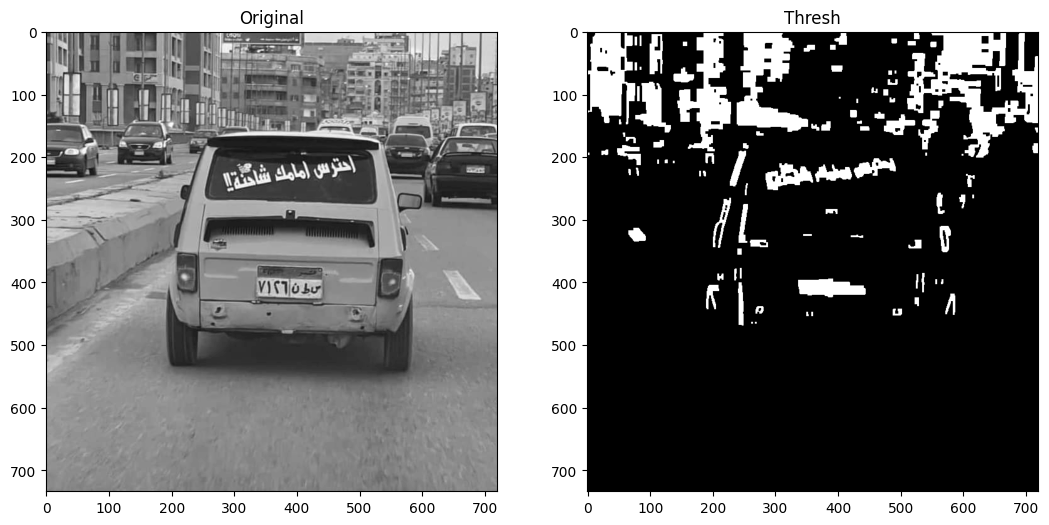

In [38]:
cnts = cv.findContours(thresh.copy(), cv.RETR_EXTERNAL,
			cv.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
cnts = sorted(cnts, key=cv.contourArea, reverse=True)[:5]
print(cnts)
show_images([img, thresh], ['Original', 'Thresh'])